In [11]:
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors, Draw, AllChem, Descriptors
from rdkit.Chem.Draw import rdMolDraw2D, MolToImage
from rdkit.Chem.EState import EState, EState_VSA
import numpy as np
import re
from collections import namedtuple
from IPython.display import SVG, display

def load_crippen_data():
    """Load Crippen data for atom typing"""
    # This data is from the blog post
    rdkit_data = '''C1    [CH4]   0.1441  2.503   
    C1  [CH3]C  0.1441  2.503   
    C1  [CH2](C)C   0.1441  2.503   
    C2  [CH](C)(C)C 0   2.433   
    C2  [C](C)(C)(C)C   0   2.433   
    C3  [CH3][N,O,P,S,F,Cl,Br,I]    -0.2035 2.753   
    C3  [CH2X4]([N,O,P,S,F,Cl,Br,I])[A;!#1] -0.2035 2.753   
    C4  [CH1X4]([N,O,P,S,F,Cl,Br,I])([A;!#1])[A;!#1]    -0.2051 2.731   
    C4  [CH0X4]([N,O,P,S,F,Cl,Br,I])([A;!#1])([A;!#1])[A;!#1]   -0.2051 2.731   
    C5  [C]=[!C;A;!#1]  -0.2783 5.007   
    C6  [CH2]=C 0.1551  3.513   
    C6  [CH1](=C)[A;!#1]    0.1551  3.513   
    C6  [CH0](=C)([A;!#1])[A;!#1]   0.1551  3.513   
    C6  [C](=C)=C   0.1551  3.513   
    C7  [CX2]#[A;!#1]   0.0017  3.888   
    C8  [CH3]c  0.08452 2.464   
    C9  [CH3]a  -0.1444 2.412   
    C10 [CH2X4]a    -0.0516 2.488   
    C11 [CHX4]a 0.1193  2.582   
    C12 [CH0X4]a    -0.0967 2.576   
    C13 [cH0]-[A;!C;!N;!O;!S;!F;!Cl;!Br;!I;!#1] -0.5443 4.041   
    C14 [c][#9] 0   3.257   
    C15 [c][#17]    0.245   3.564   
    C16 [c][#35]    0.198   3.18    
    C17 [c][#53]    0   3.104   
    C18 [cH]    0.1581  3.35    
    C19 [c](:a)(:a):a   0.2955  4.346   
    C20 [c](:a)(:a)-a   0.2713  3.904   
    C21 [c](:a)(:a)-C   0.136   3.509   
    C22 [c](:a)(:a)-N   0.4619  4.067   
    C23 [c](:a)(:a)-O   0.5437  3.853   
    C24 [c](:a)(:a)-S   0.1893  2.673   
    C25 [c](:a)(:a)=[C,N,O] -0.8186 3.135   
    C26 [C](=C)(a)[A;!#1]   0.264   4.305   
    C26 [C](=C)(c)a 0.264   4.305   
    C26 [CH1](=C)a  0.264   4.305   
    C26 [C]=c   0.264   4.305   
    C27 [CX4][A;!C;!N;!O;!P;!S;!F;!Cl;!Br;!I;!#1]   0.2148  2.693   
    CS  [#6]    0.08129 3.243   
    H1  [#1][#6,#1] 0.123   1.057   
    H2  [#1]O[CX4,c]    -0.2677 1.395   
    H2  [#1]O[!#6;!#7;!#8;!#16] -0.2677 1.395   
    H2  [#1][!#6;!#7;!#8]   -0.2677 1.395   
    H3  [#1][#7]    0.2142  0.9627  
    H3  [#1]O[#7]   0.2142  0.9627  
    H4  [#1]OC=[#6,#7,O,S]  0.298   1.805   
    H4  [#1]O[O,S]  0.298   1.805   
    HS  [#1]    0.1125  1.112   
    N1  [NH2+0][A;!#1]  -1.019  2.262   
    N2  [NH+0]([A;!#1])[A;!#1]  -0.7096 2.173   
    N3  [NH2+0]a    -1.027  2.827   
    N4  [NH1+0]([!#1;A,a])a -0.5188 3   
    N5  [NH+0]=[!#1;A,a]    0.08387 1.757   
    N6  [N+0](=[!#1;A,a])[!#1;A,a]  0.1836  2.428   
    N7  [N+0]([A;!#1])([A;!#1])[A;!#1]  -0.3187 1.839   
    N8  [N+0](a)([!#1;A,a])[A;!#1]  -0.4458 2.819   
    N8  [N+0](a)(a)a    -0.4458 2.819   
    N9  [N+0]#[A;!#1]   0.01508 1.725   
    N10 [NH3,NH2,NH;+,+2,+3]    -1.95       
    N11 [n+0]   -0.3239 2.202   
    N12 [n;+,+2,+3] -1.119      
    N13 [NH0;+,+2,+3]([A;!#1])([A;!#1])([A;!#1])[A;!#1] -0.3396 0.2604  
    N13 [NH0;+,+2,+3](=[A;!#1])([A;!#1])[!#1;A,a]   -0.3396 0.2604  
    N13 [NH0;+,+2,+3](=[#6])=[#7]   -0.3396 0.2604  
    N14 [N;+,+2,+3]#[A;!#1] 0.2887  3.359   
    N14 [N;-,-2,-3] 0.2887  3.359   
    N14 [N;+,+2,+3](=[N;-,-2,-3])=N 0.2887  3.359   
    NS  [#7]    -0.4806 2.134   
    O1  [o] 0.1552  1.08    
    O2  [OH,OH2]    -0.2893 0.8238  
    O3  [O]([A;!#1])[A;!#1] -0.0684 1.085   
    O4  [O](a)[!#1;A,a] -0.4195 1.182   
    O5  [O]=[#7,#8] 0.0335  3.367   
    O5  [OX1;-,-2,-3][#7]   0.0335  3.367   
    O6  [OX1;-,-2,-2][#16]  -0.3339 0.7774  
    O6  [O;-0]=[#16;-0] -0.3339 0.7774  
    O12 [O-]C(=O)   -1.326      
    O7  [OX1;-,-2,-3][!#1;!N;!S]    -1.189  0   
    O8  [O]=c   0.1788  3.135   
    O9  [O]=[CH]C   -0.1526 0   
    O9  [O]=C(C)([A;!#1])   -0.1526 0   
    O9  [O]=[CH][N,O]   -0.1526 0   
    O9  [O]=[CH2]   -0.1526 0   
    O9  [O]=[CX2]=O -0.1526 0   
    O10 [O]=[CH]c   0.1129  0.2215  
    O10 [O]=C([C,c])[a;!#1] 0.1129  0.2215  
    O10 [O]=C(c)[A;!#1] 0.1129  0.2215  
    O11 [O]=C([!#1;!#6])[!#1;!#6]   0.4833  0.389   
    OS  [#8]    -0.1188 0.6865  
    F   [#9-0]  0.4202  1.108   
    Cl  [#17-0] 0.6895  5.853   
    Br  [#35-0] 0.8456  8.927   
    I   [#53-0] 0.8857  14.02   
    Hal [#9,#17,#35,#53;-]  -2.996      
    Hal [#53;+,+2,+3]   -2.996      
    Hal [+;#3,#11,#19,#37,#55]  -2.996      
    P   [#15]   0.8612  6.92    
    S2  [S;-,-2,-3,-4,+1,+2,+3,+5,+6]   -0.0024 7.365   
    S2  [S-0]=[N,O,P,S] -0.0024 7.365   
    S1  [S;A]   0.6482  7.591   
    S3  [s;a]   0.6237  6.691   
    Me1 [#3,#11,#19,#37,#55]    -0.3808 5.754   
    Me1 [#4,#12,#20,#38,#56]    -0.3808 5.754   
    Me1 [#5,#13,#31,#49,#81]    -0.3808 5.754   
    Me1 [#14,#32,#50,#82]   -0.3808 5.754   
    Me1 [#33,#51,#83]   -0.3808 5.754   
    Me1 [#34,#52,#84]   -0.3808 5.754   
    Me2 [#21,#22,#23,#24,#25,#26,#27,#28,#29,#30]   -0.0025     
    Me2 [#39,#40,#41,#42,#43,#44,#45,#46,#47,#48]   -0.0025     
    Me2 [#72,#73,#74,#75,#76,#77,#78,#79,#80]   -0.0025     '''
    
    CrippenTuple = namedtuple('CrippenTuple',
                              ('name', 'smarts', 'logp_contrib', 'mr_contrib', 'note'))

    crippenData = []
    for line in rdkit_data.split('\n'):
        line = line.strip()
        if not line:
            continue
        parts = re.split(r'\s+', line)
        # we need at least 4 columns: name, smarts, logP, MR
        if len(parts) < 4:
            continue
        name, smarts = parts[0], parts[1]
        try:
            logp = float(parts[2])
        except ValueError:
            logp = None
        try:
            mr = float(parts[3])
        except ValueError:
            mr = None
        note = parts[4] if len(parts) > 4 else ""
        crippenData.append(CrippenTuple(name, smarts, logp, mr, note))

    return crippenData


import re
from rdkit.Chem import Descriptors

import re
from rdkit.Chem import Descriptors

def get_vsa_bin_bounds(descriptor_name):
    """
    Given a descriptor like "SMR_VSA3" or "SlogP_VSA1", parse its __doc__
    and return (lower_bound, upper_bound) as floats.
    """
    func = getattr(Descriptors, descriptor_name, None)
    if func is None or func.__doc__ is None:
        raise ValueError(f"No such descriptor {descriptor_name!r} or missing __doc__")
    doc = func.__doc__
    # unified pattern: matches "a <= x < b", "a < x < b", including "-inf"
    m = re.search(
        r"""\(\s*([+-]?\d*\.?\d+|[-]?inf)  # group 1: a or -inf
              \s*(?:<=|<)\s*x\s*(?:<|<=)\s*
              ([+-]?\d*\.?\d+|[-]?inf)      # group 2: b or inf
          \s*\)""",
        doc,
        flags=re.IGNORECASE | re.VERBOSE
    )
    if m:
        lb, ub = m.group(1).lower(), m.group(2).lower()
        lower = float("-inf") if lb in ("-inf",) else float(lb)
        upper = float("inf") if ub in ("inf", "+inf") else float(ub)
        return lower, upper

    # fallback: single‑sided "( x < b )"
    m2 = re.search(r"\(\s*x\s*<\s*([+-]?\d*\.?\d+)\s*\)", doc)
    if m2:
        return float("-inf"), float(m2.group(1))
    # fallback: "( a <= x )"
    m3 = re.search(r"\(\s*([+-]?\d*\.?\d+)\s*<=\s*x\s*\)", doc)
    if m3:
        return float(m3.group(1)), float("inf")

    raise ValueError(f"Could not parse bin bounds from {doc!r}")

def get_bin_bounds(idx, bins):
    """
    idx is 1‑based. bins is a sorted list of length N.
      idx == 1       → (-inf, bins[0])
      2 <= idx <= N → [bins[idx-2], bins[idx-1])
      idx == N + 1   → [bins[-1], inf)
    """
    N = len(bins)
    if idx == 1:
        return float("-inf"), bins[0]
    elif 2 <= idx <= N:
        return bins[idx-2], bins[idx-1]
    elif idx == N + 1:
        return bins[-1], float("inf")
    else:
        raise ValueError(f"Index {idx} out of range for {N}-boundary bins")
        
def visualize_vsa_contributions(smiles, highlight_descriptors=None):
    """
    Analyze and visualize VSA descriptor contributions for a molecule,
    including SMR_VSA, SlogP_VSA, EState_VSA and VSA_EState families.
    """
    if highlight_descriptors is None:
        highlight_descriptors = ["SMR_VSA8", "SlogP_VSA8"]

    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        print(f"Error: Could not parse SMILES '{smiles}'")
        return
    if not mol.GetNumConformers():
        AllChem.Compute2DCoords(mol)

    # precompute all per-atom values/contributions
    crippen_contribs = rdMolDescriptors._CalcCrippenContribs(mol)
    vsa_contribs    = list(rdMolDescriptors._CalcLabuteASAContribs(mol)[0])
    estate_indices  = EState.EStateIndices(mol)

    for desc in highlight_descriptors:
        # --- pick the correct pairing of "values" vs "contributions" and the bin boundaries ---
        if desc.startswith("SMR_VSA") or desc.startswith("SlogP_VSA"):
            # SMR_VSA* or SlogP_VSA* via get_vsa_bin_bounds()
            try:
                lower, upper = get_vsa_bin_bounds(desc)
            except ValueError as e:
                print(e)
                continue
            prop_idx   = 1 if desc.startswith("SMR") else 0
            values     = [c[prop_idx] for c in crippen_contribs]
            contributions = vsa_contribs

        elif desc.startswith("EState_VSA"):
            # EState_VSA*: sum VSA over EState bins
            idx = int(desc.split("EState_VSA")[1]) #descriptors start from 1

            bins = EState_VSA.estateBins
            lower, upper = get_bin_bounds(idx, bins)
            
            values       = estate_indices
            contributions = vsa_contribs

        elif desc.startswith("VSA_EState"):
            # VSA_EState*: sum EState over VSA bins
            idx = int(desc.split("VSA_EState")[1]) #descriptors start from 1
            bins = EState_VSA.vsaBins
            lower, upper = get_bin_bounds(idx, bins)
            
            values       = vsa_contribs
            contributions = estate_indices

        else:
            print(f"Unknown descriptor '{desc}', skipping.")
            continue

        # --- find atoms in the selected bin ---
        atoms, contribs = [], []
        for i, (val, contrib) in enumerate(zip(values, contributions)):
            if lower <= val < upper:
                atoms.append(i)
                contribs.append(contrib)
        total = sum(contribs)
        if not atoms:
            print(f"\nNo atoms contribute to {desc} (range {lower} to {upper}).")
            continue

        # --- normalize & color (green intensity here; switch channels as you like) ---
        norm = {i: c/total for i, c in zip(atoms, contribs)}
        highlight_colors = {i: (0.0, max(0.6, v), 0.0) for i, v in norm.items()}

        # --- draw SVG with atom indices ---
        drawer = rdMolDraw2D.MolDraw2DSVG(500, 500)
        drawer.drawOptions().addAtomIndices = True
        rdMolDraw2D.PrepareAndDrawMolecule(
            drawer, mol,
            highlightAtoms=list(atoms),
            highlightAtomColors=highlight_colors
        )
        drawer.FinishDrawing()
        display(SVG(drawer.GetDrawingText()))

        # --- print contribution table ---
        print(f"\n### {desc} Contributions — Total: {total:.4f}")
        print(f"Bin range: {lower:.4f} to {upper:.4f}")
        print(f"{'Idx':<4s}{'Sym':<4s}{'Value':>8s}{'Contrib':>12s}{'% of total':>12s}")
        print("-"* 40)
        for i in atoms:
            sym   = mol.GetAtomWithIdx(i).GetSymbol()
            val   = values[i]
            cst   = contributions[i]
            pct   = 100*cst/total if total else 0
            print(f"{i:<4d}{sym:<4s}{val:8.3f}{cst:12.3f}{pct:12.1f}%")


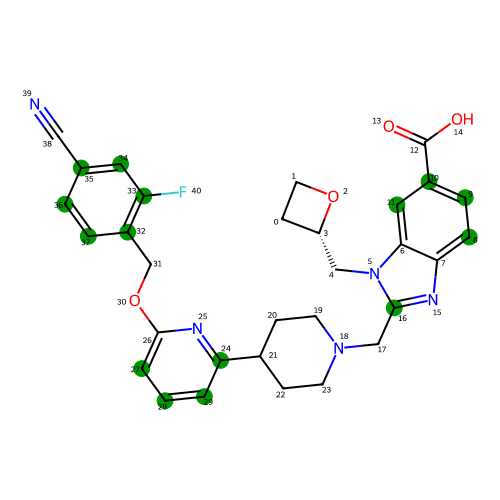


### SMR_VSA7 Contributions — Total: 88.6232
Bin range: 3.0500 to 3.6300
Idx Sym    Value     Contrib  % of total
----------------------------------------
8   C      3.350       6.066         6.8%
9   C      3.350       6.066         6.8%
10  C      3.509       5.563         6.3%
11  C      3.350       6.066         6.8%
16  C      3.509       5.824         6.6%
24  C      3.509       5.694         6.4%
27  C      3.350       6.066         6.8%
28  C      3.350       6.066         6.8%
29  C      3.350       6.066         6.8%
32  C      3.509       5.563         6.3%
33  C      3.257       5.817         6.6%
34  C      3.350       6.066         6.8%
35  C      3.509       5.563         6.3%
36  C      3.350       6.066         6.8%
37  C      3.350       6.066         6.8%


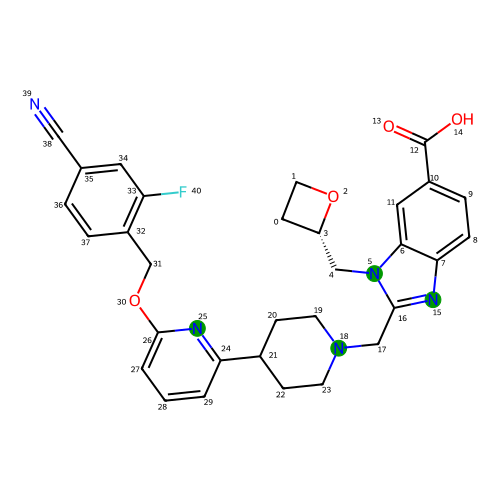


### SMR_VSA3 Contributions — Total: 19.4350
Bin range: 1.8200 to 2.2400
Idx Sym    Value     Contrib  % of total
----------------------------------------
5   N      2.202       4.567        23.5%
15  N      2.202       4.984        25.6%
18  N      1.839       4.900        25.2%
25  N      2.202       4.984        25.6%


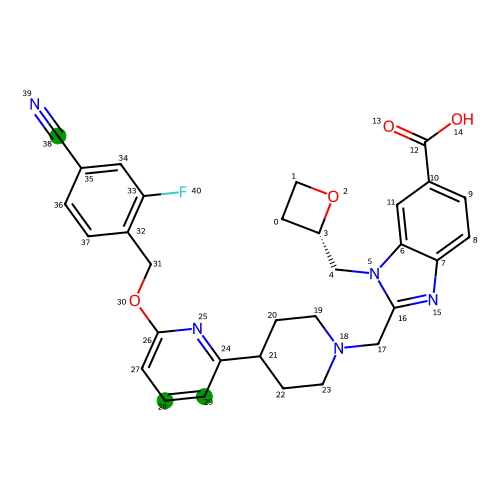


### EState_VSA7 Contributions — Total: 18.2020
Bin range: 1.8070 to 2.0500
Idx Sym    Value     Contrib  % of total
----------------------------------------
28  C      1.912       6.066        33.3%
29  C      2.008       6.066        33.3%
38  C      1.930       6.069        33.3%


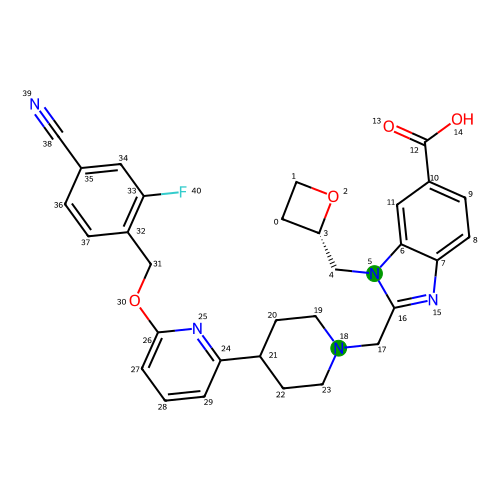


### EState_VSA8 Contributions — Total: 9.4670
Bin range: 2.0500 to 4.6900
Idx Sym    Value     Contrib  % of total
----------------------------------------
5   N      2.122       4.567        48.2%
18  N      2.377       4.900        51.8%


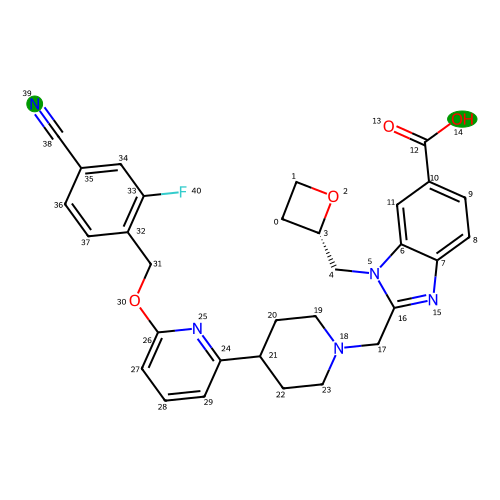


### VSA_EState3 Contributions — Total: 18.4172
Bin range: 5.0000 to 5.4100
Idx Sym    Value     Contrib  % of total
----------------------------------------
14  O      5.107       9.489        51.5%
39  N      5.262       8.928        48.5%

No atoms contribute to VSA_EState9 (range 7.0 to 11.0).


In [12]:
#Danuglipron
smiles ="C1CO[C@@H]1CN2C3=C(C=CC(=C3)C(=O)O)N=C2CN4CCC(CC4)C5=NC(=CC=C5)OCC6=C(C=C(C=C6)C#N)F"
visualize_vsa_contributions(smiles, ["SMR_VSA7", "SMR_VSA3", "EState_VSA7", "EState_VSA8", "VSA_EState3", "VSA_EState9"])